# IMPORTING AND MANAGING FINANCIAL DATA IN PYTHON

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">CHAPTER 1 - Importing stock listing data from Excel</a>

2. <a href="#item2">CHAPTER 2 - Importing financial data from the web</a>

3. <a href="#item3">CHAPTER 3 - Summarizing your data and visualizing the result</a>
    
4. <a href="#item4">CHAPTER 4 - Aggregating and describing your data by category</a>
   
</font>
</div>

<a id='item1'></a>

# CHAPTER 1 - Importing stock listing data from Excel

## Reading, inspecting, and cleaning data from CSV

In [81]:
# Import pandas library
import pandas as pd

import os
os.environ['IEX_API_VERSION'] = 'iexcloud-sandbox'
os.environ["IEX_API_KEY"] = "pk_658f58c6186247e4a1a68803fb65d567"

# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv')

# Display first 10 rows
print(nasdaq.head(10))

# Inspect nasdaq
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   
5           FB         Facebook, Inc.     139.39           4.030000e+11   
6        CMCSA    Comcast Corporation      37.14           1.760000e+11   
7         INTC      Intel Corporation      35.25           1.660000e+11   
8         CSCO    Cisco Systems, Inc.      32.42           1.620000e+11   
9         AMGN             Amgen Inc.     161.61           1.190000e+11   

  IPO Year             Sector  \
0     1980         Technology   
1      NAN         Technology   
2     2004         Technology   
3     1986         Technology   
4     199

In [82]:
# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])

# Display the head of the data
print(nasdaq.head())

# Inspect the data
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   

   IPO Year             Sector  \
0    1980.0         Technology   
1       NaN         Technology   
2    2004.0         Technology   
3    1986.0         Technology   
4    1997.0  Consumer Services   

                                          Industry Last Update  
0                           Computer Manufacturing  2017-04-26  
1  Computer Software: Programming, Data Processing  2017-04-24  
2  Computer Software: Programming, Data Processing  2017-04-23  
3          Computer Software: Prepackaged Software  2017-04-26  
4                  

### Read data from Excel worksheets

In [83]:
# Import the data
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')

# Display the head of the data
print(nyse.head())

# Inspect the data
nyse.info()

  Stock Symbol            Company Name  Last Sale  Market Capitalization  \
0          DDD  3D Systems Corporation      14.48           1.647165e+09   
1          MMM              3M Company     188.65           1.127366e+11   
2         WBAI         500.com Limited      13.96           5.793129e+08   
3         WUBA             58.com Inc.      36.11           5.225238e+09   
4          AHC   A.H. Belo Corporation       6.20           1.347351e+08   

   IPO Year             Sector  \
0       NaN         Technology   
1       NaN        Health Care   
2    2013.0  Consumer Services   
3    2013.0         Technology   
4       NaN  Consumer Services   

                                          Industry  
0          Computer Software: Prepackaged Software  
1                       Medical/Dental Instruments  
2            Services-Misc. Amusement & Recreation  
3  Computer Software: Programming, Data Processing  
4                             Newspapers/Magazines  
<class 'pandas.core.

In [84]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheet_name=exchanges, na_values='n/a')
listings_1 = pd.read_excel(xls, sheet_name=exchanges, na_values='n/a')
listings_2 = pd.read_excel(xls, sheet_name=exchanges, na_values='n/a')

# Inspect NASDAQ listings
listings['nasdaq'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   Market Capitalization  3167 non-null   float64
 4   IPO Year               1386 non-null   float64
 5   Sector                 2767 non-null   object 
 6   Industry               2767 non-null   object 
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


### Combine data from multiple worksheets

In [85]:
# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq]) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   M

In [6]:
combined_listings

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry,Exchange
0,DDD,3D Systems Corporation,14.48,1.647165e+09,NaN,Technology,Computer Software: Prepackaged Software,NYSE
1,MMM,3M Company,188.65,1.127366e+11,NaN,Health Care,Medical/Dental Instruments,NYSE
2,WBAI,500.com Limited,13.96,5.793129e+08,2013.0,Consumer Services,Services-Misc. Amusement & Recreation,NYSE
3,WUBA,58.com Inc.,36.11,5.225238e+09,2013.0,Technology,"Computer Software: Programming, Data Processing",NYSE
4,AHC,A.H. Belo Corporation,6.20,1.347351e+08,NaN,Consumer Services,Newspapers/Magazines,NYSE
...,...,...,...,...,...,...,...,...
3162,WSFSL,WSFS Financial Corporation,25.70,0.000000e+00,NaN,Finance,Major Banks,NASDAQ
3163,XGTIW,"XG Technology, Inc",6.56,0.000000e+00,2013.0,Consumer Durables,Telecommunications Equipment,NASDAQ
3164,ZNWAA,Zion Oil & Gas Inc,NaN,0.000000e+00,NaN,Energy,Oil & Gas Production,NASDAQ
3165,ZIONW,Zions Bancorporation,9.87,0.000000e+00,NaN,Finance,Major Banks,NASDAQ


In [7]:
combined_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6314 entries, 0 to 3166
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6314 non-null   object 
 1   Company Name           6314 non-null   object 
 2   Last Sale              6244 non-null   float64
 3   Market Capitalization  6314 non-null   float64
 4   IPO Year               2747 non-null   float64
 5   Sector                 4944 non-null   object 
 6   Industry               4944 non-null   object 
 7   Exchange               6314 non-null   object 
dtypes: float64(3), object(5)
memory usage: 444.0+ KB


### Automate the loading and combining of data from multiple Excel worksheets

In [87]:
# Create the pd.ExcelFile() object
xls = pd.ExcelFile('listings.xls')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)
listing_data_2 = pd.concat(listings)
listing_data_3 = pd.concat(listings)

# Inspect the results
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


In [89]:
listing_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           6674 non-null   object 
 1   Company Name           6674 non-null   object 
 2   Last Sale              6590 non-null   float64
 3   Market Capitalization  6674 non-null   float64
 4   IPO Year               2852 non-null   float64
 5   Sector                 5182 non-null   object 
 6   Industry               5182 non-null   object 
 7   Exchange               6674 non-null   object 
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


<a id='item2'></a>

## CHAPTER 2 - Importing financial data from the web

### The DataReader: Access financial data online

Get stock data for a single company

In [9]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date # Date & time functionality

# Set start and end dates
start = date(2016,1,1)
end = date(2016,12,31)

# Set the ticker
ticker = 'AAPL'

# Set the data source
data_source = 'iex'

# Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(stock_prices.head())
stock_prices.info()

RemoteDataError: Unable to read URL: https://cloud.iexapis.com/stable/stock/market/batch?symbols=AAPL&types=chart&range=5y&token=pk_658f58c6186247e4a1a68803fb65d567
Response Text:
b'You have exceeded your allotted message quota. Please enable pay-as-you-go to regain access'

### Visualize a stock price trend

In [11]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set start and end dates
start = date (2016,1,1)
end = date (2016,12,31)

# Set the ticker and data_source
ticker = 'FB'
data_source = 'iex'

# Import the data using DataReader
stock_prices = DataReader(ticker, data_source, start, end)

# Plot close
stock_prices['close'].plot(title=ticker)

# Show the plot
plt.show()

RemoteDataError: Unable to read URL: https://cloud.iexapis.com/stable/stock/market/batch?symbols=FB&types=chart&range=5y&token=pk_658f58c6186247e4a1a68803fb65d567
Response Text:
b'You have exceeded your allotted message quota. Please enable pay-as-you-go to regain access'

### Visualize the long-term gold price trend

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13682 entries, 1968-04-01 to 2020-09-08
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GOLDAMGBD228NLBM  13258 non-null  float64
dtypes: float64(1)
memory usage: 213.8 KB


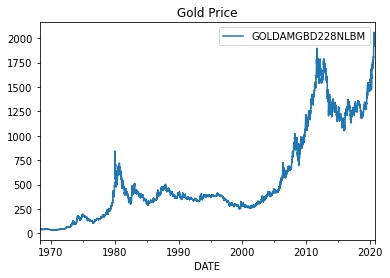

In [12]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set start date
start = date(1968,1,1)

# Set series code
series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price')

# Show the plot
plt.show()

### Compare labor market participation and unemployment rates

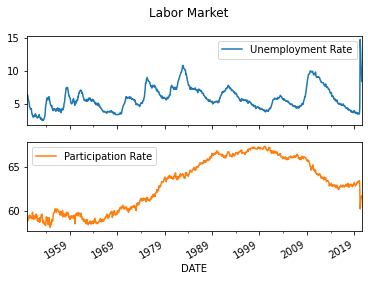

In [13]:
# Set the start date
start = date(1950,1,1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(title='Labor Market', subplots=True)

# Show the plot
plt.show()

### Compare bond and stock performance

Bonds and stocks are the most important investment alternatives. Now that you can import data from both the Federal Reserve and Google Finance, you can compare the performance of both asset classes. You'll be using a Total Return Index for each class, which accounts for returns due to both price increases and payments like interest or dividends.

For bonds, you'll use the Bank of America Merrill Lynch US High Yield Total Return Index Value ('BAMLHYH0A0HYM2TRIV'). For stocks, you'll use the S&P 500 Index ('SP500'). Both are available for the past 10 years from the Federal Reserve's FRED service.

In this exercise, you will download both series and compare their performance. DataReader, date, pandas as pd, and matplotlib.pyplot as plt have been imported.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


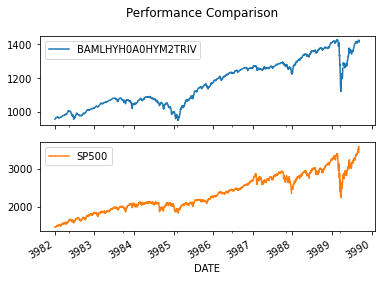

In [14]:
# Set the start date
start = date(2013,1,1)

# Set the series codes
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(title='Performance Comparison', subplots=True)

# Show the plot
plt.show()

## Select stocks and get data from Google Finance

### Select the top 5 listed consumer companies

As you have just learned, it is possible to filter stocks based on criteria with the sort_values() method and an argument that specifies the column to filter by. Additionally, you can include the argument ascending=False to sort entries from highest to lowest.

Here, you will use this function to find out the five most valuable companies in the Consumer Services sector. This is measured with market capitalization, or the combined value of all shares in a company. pandas has been imported as pd, as has the listings DataFrame from the first chapter. As a refresher, it contains data from the AMEX, NYSE, and NASDAQ.

In [15]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheet_name=exchanges, na_values='n/a')


In [16]:
listings

{'amex':        Stock Symbol                                       Company Name  \
 0              XXII                            22nd Century Group, Inc   
 1               FAX              Aberdeen Asia-Pacific Income Fund Inc   
 2               IAF                 Aberdeen Australia Equity Fund Inc   
 3                CH                          Aberdeen Chile Fund, Inc.   
 4    ABE             Aberdeen Emerging Markets Smaller Company Oppo...   
 ..              ...                                                ...   
 355             WYY                              WidePoint Corporation   
 356             WTT                      Wireless Telecom Group,  Inc.   
 357            XTNT                       Xtant Medical Holdings, Inc.   
 358            YUMA                                  Yuma Energy, Inc.   
 359            ZDGE                                        Zedge, Inc.   
 
      Last Sale  Market Capitalization  IPO Year                 Sector  \
 0       1.3300

In [17]:
# Select companies in Consumer Services
consumer_services = combined_listings[combined_listings.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values('Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
print(consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head())

                   Company Name Exchange  Market Capitalization
4              Amazon.com, Inc.   NASDAQ           4.221385e+11
3013      Wal-Mart Stores, Inc.     NYSE           2.218646e+11
3014  Walt Disney Company (The)     NYSE           1.789973e+11
6           Comcast Corporation   NASDAQ           1.764745e+11
1438     Home Depot, Inc. (The)     NYSE           1.752626e+11


### Get the ticker of the largest consumer services company

Google Finance has deprecated their API but DataReader now makes available the data source 'iex' that provides the same functionality. To experiment with the data outside DataCamp environment, you will need an IEX Cloud account.

Instead of indexing your data with a conditional expression, you can also filter by certain values with .loc[row_selector, column_selector]. Additionally, you can use .set_index() to set a particular column with unique values as the index of a DataFrame, and .idxmax() to return the index of the maximum value.

In this exercise, you will apply these methods of selecting companies to find the most valuable consumer services company on any of the three exchanges, and use its ticker to plot its stock price trend. DataReader, date, pandas as pd, and matplotlib.pyplot as plt have been imported, as has the listings DataFrame from the last exercise.

In [18]:
pip install iex-api-python

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
# Set the index of listings to Stock Symbol
listings_ss = combined_listings.set_index('Stock Symbol')

# Get ticker of the largest Consumer Services company
ticker = listings_ss.loc[listings_ss.Sector =='Consumer Services', 'Market Capitalization'].idxmax()

# Set the start date
start = date(2015,1,1)

# Import the stock data
data = DataReader(ticker,'iex', start)

# Plot close and volume
data[['close', 'volume']].plot(secondary_y='volume', title=ticker)

# Show the plot
plt.show()

RemoteDataError: Unable to read URL: https://cloud.iexapis.com/stable/stock/market/batch?symbols=AMZN&types=chart&range=max&token=pk_658f58c6186247e4a1a68803fb65d567
Response Text:
b'You have exceeded your allotted message quota. Please enable pay-as-you-go to regain access'

### Get the largest consumer company listed after 1998

Google Finance has deprecated their API but DataReader now makes available instead the data source 'iex'. To experiment with the data outside DataCamp environment, you will need an IEX Cloud account.

The functionality using 'iex' is the same except: data is limited to the last five years, column headers are lower case.

You can filter your data by even more conditions by enclosing each condition in parentheses and using logical operators like & and |.

Here, you will find out which company is the largest consumer services company that went public after Amazon did in 1997. The data is contained in the column 'IPO Year'; an Initial Public Offering (IPO) is a financial term that describes the first time that the stock of a private company is offered to the public.

DataReader, date, pandas as pd, and matplotlib.pyplot as plt have been imported. The listings DataFrame from the last exercise is also available.

In [20]:
# Set Stock Symbol as the index
listings = combined_listings.set_index('Stock Symbol')


# Get ticker of the largest consumer services company listed after 1997
ticker = listings.loc[(listings.Sector == 'Consumer Services') & (listings['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

# Set the start date
start = date(2015, 1, 1)

# Import the stock data
data = DataReader(ticker, 'iex', start)

# Plot close and volume
data[['close', 'volume']].plot(secondary_y='volume', title=ticker)

# Show the plot
plt.show()

RemoteDataError: Unable to read URL: https://cloud.iexapis.com/stable/stock/market/batch?symbols=NFLX&types=chart&range=max&token=pk_658f58c6186247e4a1a68803fb65d567
Response Text:
b'You have exceeded your allotted message quota. Please enable pay-as-you-go to regain access'

### Get data for the 3 largest financial companies

Google Finance has deprecated their API but DataReader now makes available instead the data source 'iex'. To experiment with the data outside DataCamp environment, you will need an IEX Cloud account.

The functionality using 'iex' is the same except: data is limited to the last five years, column headers are lower case, and for multiple tickers the return value is a dictionary rather than a pandas.Panel. We have included a few lines of code in the exercise to convert the dictionary into a DataFrame with MultiIndex like in the video.

A pd.MultiIndex() object has more than one identifier per row. This allows you to get the data based on criteria for multiple companies at once.

Let's apply this new skill to get the stock prices for the largest companies in the financial sector. DataReader, date, pandas as pd, and matplotlib.pyplot as plt have been imported, as has the listings DataFrame from the last exercise.

In [21]:
# Set Stock Symbol as the index
listings_ss = combined_listings.set_index('Stock Symbol')

# Get ticker of 3 largest finance companies
top_3_companies = listings_ss.loc[listings_ss.Sector == 'Finance', 'Market Capitalization'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

# Set start date
start = date(2015, 1, 1)

# Set end date
end = date(2020, 4, 1)

# Import stock data
result = DataReader(top_3_tickers, 'iex', start, end)
result = result[~result.index.duplicated()]
data = pd.DataFrame()
for ticker in result.columns.levels[1]:
    index = pd.MultiIndex.from_arrays([
            [ticker] * len(result),
            result.index.values
            ], names=['ticker', 'date'])
    ticker_df = pd.DataFrame(index=index)
    for col in result.columns.levels[0]:
        ticker_df[col] = result[col][ticker].values
    data = pd.concat([data, ticker_df])

# Unstack and inspect result
data['close'].unstack().info()

RemoteDataError: Unable to read URL: https://cloud.iexapis.com/stable/stock/market/batch?symbols=JPM%2CWFC%2CBAC&types=chart&range=max&token=pk_658f58c6186247e4a1a68803fb65d567
Response Text:
b'You have exceeded your allotted message quota. Please enable pay-as-you-go to regain access'

<a id='item3'></a>

## CHAPTER 3 - Summarizing your data and visualizing the result

### List the poorest and richest countries worldwide

The values of numerical variables are numbers. They can be described by measures of central tendency, or the most typical value in a dataset, and dispersion, which represents the spread of a distribution.

In the next few exercises, you will use these statistics to explore the data in 'per_capita_income.csv', which contains the average income earned per person in a given country. The first step in analyzing aspects of the global income distribution is to inspect and familiarize yourself with the data.

pandas has been imported as pd.

In [22]:
# Import the data
income = pd.read_csv('per_capita_income.csv')

# Inspect the result
income.info()

# Sort the data by income
income = income.sort_values('Income per Capita', ascending=False)

# Display the first and last five rows
print(income.head())
print(income.tail(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            184 non-null    object 
 1   Income per Capita  184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB
               Country  Income per Capita
133              Qatar       141542.66280
97    Macao SAR, China       111496.62940
96          Luxembourg       102051.68030
144          Singapore        85382.30227
23   Brunei Darussalam        78369.29102
                      Country  Income per Capita
121                     Niger         955.483324
94                    Liberia         835.366935
37           Congo, Dem. Rep.         784.365232
26                    Burundi         727.150789
31   Central African Republic         618.752859


### Global incomes: Central tendency

The most common measures of central tendency are the mean, which is equal to the sum of all values divided by the total number of values, median, which separates the upper half of data from the lower half, and mode, which is the most frequent value in the data set. The pandas package contains functions that can calculate each of these.

In this data set, the values for 'Income per Capita' are floats, and there are no repeat values, so running income['Income per Capita'].mode() in your console returns an empty series. Here, you will use the floor division operator // to add a new column that measures income in thousands, rounded down, so that a value such as 11,543.43 becomes just 11. Then, you will run the above functions to better understand how incomes are distributed.

pandas has been imported as pd, and the income DataFrame from the previous exercise is in your workspace.

In [23]:
# Calculate the mean
print(income['Income per Capita'].mean())

# Calculate the median
print(income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita'] // 1000

# Calculate the mode of the new column
income['Income per Capita (,000)'].mode()

19469.41956573696
11620.932519999998


0    1.0
dtype: float64

### Global incomes: Dispersion

A quantile is a measure of dispersion created by dividing a frequency distribution of a DataFrame into even groups. You can return values at the given quantile q of a DataFrame df with the command df.quantile(q); likewise, supplying a list as q will return a value for each given quantile.

Here, you will continue your analysis of global income distribution using two measures of dispersion: the standard deviation, or square root of variance, and the interquartile range (IQR).

pandas has been imported as pd, and the income DataFrame from the previous exercise is in your workspace.

In [24]:
# Calculate mean
mean = income['Income per Capita'].mean()

# Calculate standard deviation
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean - std, mean + std]
print(bounds)

# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([.25, .75])
print(quantiles)

# Calculate and print IQR
iqr = quantiles[.75] - quantiles[.25]
print(iqr)

[-2497.4416414691186, 41436.280772943035]
0.25     3922.35894
0.75    26558.75467
Name: Income per Capita, dtype: float64
22636.39573


### Deciles of the global income distribution

A decile is a special kind of quantile obtained by dividing the distribution of a particular dataset by ten. Deciles (as well as any other kind of quantile) can be created by supplying the following numpy function to .quantile(), where start is the beginning of the interval (inclusive), stop is the end of the interval (exclusive), and step is the spacing between any two adjacent values:

np.arange(start, stop, step)

As you saw in the video, a standard bar graph is a great way to visualize the distribution of data. You can create one by adding kind='bar' as an argument to .plot().

Now it's your turn to apply this knowledge to plot a summary of the income distribution in deciles! pandas as pd, numpy as np, and matplotlib.pyplot as plt have been imported for you, and the income DataFrame from the previous exercise is available in your workspace.

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
0.1     1805.906426
0.2     3177.255688
0.3     5506.323195
0.4     8510.729683
0.5    11620.932520
0.6    15790.369076
0.7    22563.075646
0.8    32517.693902
0.9    47377.886804
Name: Income per Capita, dtype: float64


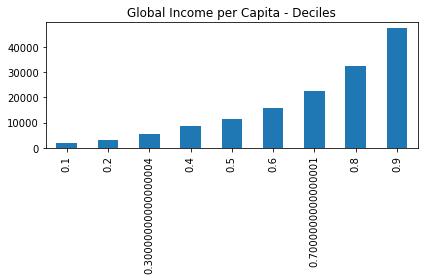

In [25]:
import numpy as np

# Generate range of deciles
quantiles = np.arange(start=.1, stop=.91, step=.1)

# Print them
print(quantiles)

# Calculate deciles for 'Income per Capita'
deciles = income['Income per Capita'].quantile(quantiles)

# Print them
print(deciles)

# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')

# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

### Visualizing international income distribution

seaborn is a Python visualization library for statistical data visualization based on matplotlib.

By default, the distplot() function in the seaborn package creates a histogram, where data is grouped into ranges and and plotted as bars, and fits a kernel density estimation (KDE), or smoothed histogram. You can also use distplot() to create another kind of graph called a rugplot, which adds markers at the bottom of the chart to indicate the density of observations along the x axis.

seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, ...)

In previous exercises, you created a quantile plot which provided a fairly granular sense of the level of income per capita at different points of the distribution. Here, you will use distplot() to get the full picture!

pandas has been imported as pd, and the income DataFrame from the previous exercise is available in your workspace.

       Income per Capita  Income per Capita (,000)
count         184.000000                184.000000
mean        19469.419566                 18.967391
std         21966.861207                 21.975869
min           618.752859                  0.000000
25%          3922.358940                  3.000000
50%         11620.932520                 11.000000
75%         26558.754670                 26.000000
max        141542.662800                141.000000


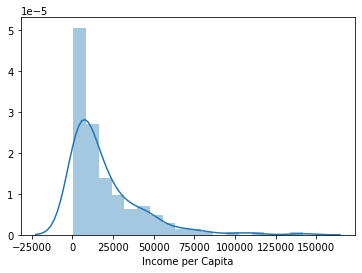

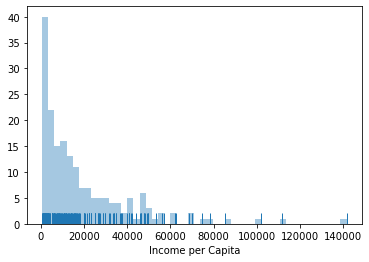

In [26]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Print the summary statistics for income
print(income.describe())

# Plot a basic histogram of income per capita
sns.distplot(income['Income per Capita'])

# Show the plot
plt.show()

# Plot a rugplot
sns.distplot(income['Income per Capita'], bins=50, kde=False, rug=True)

# Show the plot
plt.show()

### Growth rates in Brazil, China, and the US

It's time to extend your analysis beyond the levels of international per capita income to the growth rates. The 'income_growth.csv' file contains the growth rates of per capita income over the last 40 years for Brazil, China, and the US.

You will plot the distribution of the historical growth rates for each country on the same chart using a KDE plot to faciliate visual comparison of the ranges of growth that these markets have experienced over this time period.

From this point in the course onwards, you should always inspect any DataFrame with .info() in your console even if this isn't explicitly in the instructions. pandas as pd, seaborn as sns, and matplotlib.pyplot as plt have been imported.

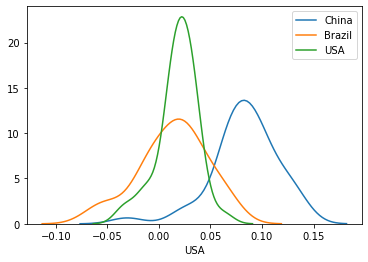

In [27]:
# Load the file into growth
growth = pd.read_csv('income_growth.csv', parse_dates=['DATE']).set_index('DATE')

# Inspect the summary statistics for the growth rates
growth.describe()

# Iterate over the three columns
for column in growth.columns:
    sns.distplot(growth[column], hist=False, label=column)
    
# Show the plot
plt.show()

Notice how you didn't have to set the kde and rug arguments in distplot() because their default values are True and False, respectively.

### Highlighting values in the distribution

Sometimes it is necessary to manipulate your data in order to create a better visualization. Two methods that can take care of missing values are .dropna() and .fillna(). You can also remove outliers by filtering entries that are over or under a certain percentile by applying a condition using .quantile() to a particular column.

You also saw in the video how to emphasize a particular value in a plot by adding a vertical line at position x across the axes:

Axes.axvline(x=0, color=None, ...)

In this exercise, you will take a final look at global income distribution, and then remove outliers above the 95th percentile, plot the distribution, and highlight both the mean and median values. pandas as pd, seaborn as sns, and matplotlib.pyplot as plt have been imported, and the income DataFrame from previous exercises is available in your workspace.

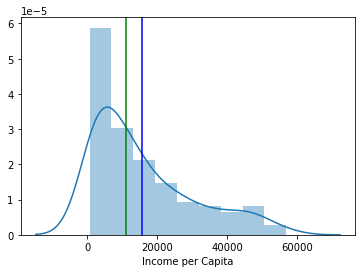

In [28]:
# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(.95)]

# Plot histogram and assign to ax
ax = sns.distplot(inc_per_capita)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()

## Summarize categorical variables

### Companies by sector on all exchanges

A categorical variable is a variable that is one of a limited number of values based on some qualitative property. A frequency distribution is a representation of the number of times that a categorical variable occurs.

Think back to the stock exchange data from the earlier chapters. The .mean() function isn't very helpful for understanding the frequency of 'Sector' values such as 'Technology' and 'Finance', whereas .value_counts() and .nunique() are.

In this exercise, you will compare the distribution of listings in the AMEX, NASDAQ, and NYSE per sector. pandas as pd and matplotlib.pyplot as plt have been imported, and the listings information from previous exercises has been loaded into a dictionary listings for which the keys are 'amex', 'nasdaq', and 'nyse'.

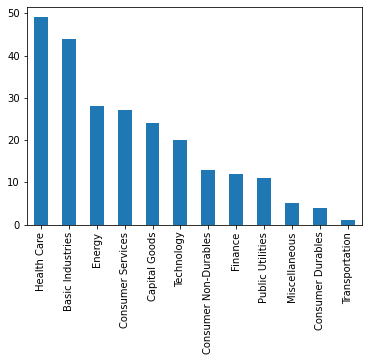

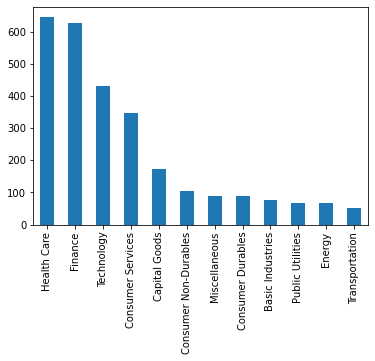

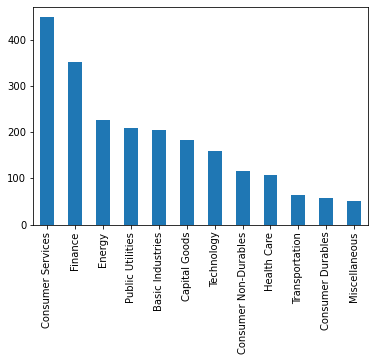

In [29]:
# Create the list exchanges
exchanges = ['amex', 'nasdaq', 'nyse']

# Iterate over exchanges then plot and show result
for exchange in exchanges:
    sectors =  listings_1[exchange].Sector.value_counts()
# Sort in descending order and plot
    sectors.sort_values(ascending=False).plot(kind='bar')
    # Show the plot
    plt.show()

### Technology IPOs by year on all exchanges

Each company in the listings dictionary has an IPO year between 1972 and 2017. Therefore, in this context, it is appropriate to consider the 'IPO Year' column of each sheet as a categorical variable with a well-defined order even though it is of dtype float64.

Here you will combine data from all three exchanges and plot the distribution of IPO years for companies in the Technology sector. pandas as pd and matplotlib.pyplot as plt have been imported, and the listings dictionary from the previous exercise is in your workspace.

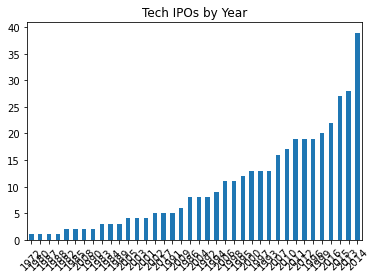

In [30]:
# Create lists
exchanges = ['amex', 'nasdaq', 'nyse']
all_listings = []

# Use for loop to create listing_data
for exchange in exchanges:
    all_listings.append(listings_1[exchange])
    
# Combine DataFrames
listing_data = pd.concat(all_listings)

# Select tech companies
tech_companies = listing_data[listing_data.Sector == 'Technology']

# Create ipo_years
ipo_years = tech_companies['IPO Year']

# Drop missing values and convert to int
ipo_years = ipo_years.dropna().astype(int)

# Count values, sort ascending by year, and create a bar plot
ipo_years.value_counts(ascending=True).plot(kind='bar', title='Tech IPOs by Year')

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

<a id='item4'></a>

# CHAPTER 4 - Aggregating and describing your data by category

This chapter introduces the ability to group data by one or more categorical variables, and to calculate and visualize summary statistics for each caategory. In the process, you will learn to compare company statistics for different sectors and IPO vintages, analyze the global income distribution over time, and learn how to create various statistical charts from the seaborn library.

### Median market capitalization by sector

Aggregate data is data combined from several measurements. As you learned in the video, the .groupby() function is helpful in aggregating your data by a specific category.

You have seen previously that the market capitalization data has large outliers. To get a more robust summary of the market value of companies in each sector, you will calculate the median market capitalization by sector. pandas as pd and matplotlib.pyplot as plt have been imported, and the NYSE stock exchange listings are available in your workspace as the DataFrame nyse.

In [31]:
# Inspect NYSE data
nyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
 7   Exchange               3147 non-null   object 
dtypes: float64(3), object(5)
memory usage: 196.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
 7   Exchange               3147 non-null   object 
dtypes: float64(3), object(5)
memory usage: 196.8+ KB


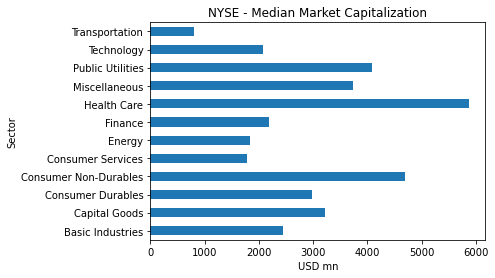

In [32]:
# Inspect NYSE data
nyse.info()

# Create market_cap_m
nyse['market_cap_m'] = nyse['Market Capitalization'].div(1e6)

# Drop market cap column
nyse = nyse.drop('Market Capitalization', axis=1)

# Group nyse by sector
mcap_by_sector = nyse.groupby('Sector')

# Calculate median
median_mcap_by_sector = mcap_by_sector.market_cap_m.median()

# Plot and show as horizontal bar chart
median_mcap_by_sector.plot(kind='barh', title='NYSE - Median Market Capitalization')

# Add the label
plt.xlabel('USD mn')

# Show the plot
plt.show()

### Median market capitalization by IPO year

In the last lesson of the previous chapter, you created a timeline for the number of IPOs per year for technology companies.

Let's now analyze how market capitalization has evolved for different IPO years. You can combine data from all three exchanges to get a more comprehensive view.

pandas as pd and matplotlib.pyplot as plt have been imported, and the listings DataFrame from previous exercises which now includes an added reference column 'exchange' that contains the exchange for each listed company, is available in your workspace.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


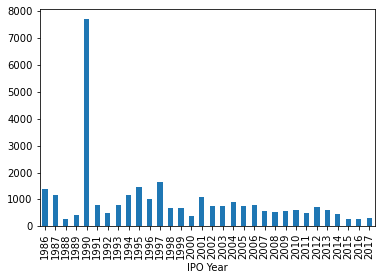

In [33]:

# Create market_cap_m
combined_listings['market_cap_m'] = combined_listings['Market Capitalization'].div(1e6)

# Select companies with IPO after 1985
combined_listings = combined_listings[combined_listings['IPO Year'] > 1985]

# Drop missing values and convert to integers
combined_listings['IPO Year'] = combined_listings['IPO Year'].dropna().astype(int)

# Calculate the median market cap by IPO Year and sort the index
ipo_by_year = combined_listings.groupby('IPO Year').market_cap_m.median().sort_index()

# Plot results as a bar chart
ipo_by_year.plot(kind='bar')

# Show the plot
plt.show()

### All summary statistics by sector

You can apply the various summary statistics that you have learned about in the last chapter to a groupby object to obtain the result on a per-category basis. This includes the .describe() function, which provides several insights all at once!

Here, you will practice this with the NASDAQ listings. pandas has been imported as pd, and the NASDAQ stock exchange listings data is available in your workspace in the nasdaq DataFrame.

In [34]:
# Inspect NASDAQ data
nasdaq.info()

# Create market_cap_m
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

# Drop the Market Capitalization column
nasdaq.drop('Market Capitalization', axis=1, inplace=True)

# Group nasdaq by Sector
nasdaq_by_sector = nasdaq.groupby('Sector')

# Create summary statistics by sector
summary = nasdaq_by_sector.describe()

# Print the summary
print(summary)

# Unstack 
summary = summary.unstack()

# Print the summary again
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3167 non-null   object 
 1   Company Name           3167 non-null   object 
 2   Last Sale              3165 non-null   float64
 3   Market Capitalization  3167 non-null   float64
 4   IPO Year               1386 non-null   float64
 5   Sector                 2767 non-null   object 
 6   Industry               2767 non-null   object 
 7   Exchange               3167 non-null   object 
dtypes: float64(3), object(5)
memory usage: 198.1+ KB
                      Last Sale                                          \
                          count       mean         std     min      25%   
Sector                                                                    
Basic Industries           78.0  21.597679   29.009745  0.0336   2.6325   
Capital Goods       

## More ways to aggregate your data

### Company value by exchange and sector

You can generate more fine-grained summaries of your data by providing a list of columns inside .groupby() and/or applying a statistical method such as .mean() directly to one or more numerical columns.

Here, you will calculate the median market capitalization for each sector, differentiated by the exchange that the companies are listed on. You will also use .unstack() to pivot the exchange labels from the rows into the columns. It's a good idea to inspect listings in your console before starting the exercise!

pandas as pd and matplotlib.pyplot as plt have been imported, and the listings DataFrame, with reference column 'Exchange' and a new column market_cap_m that contains the market cap in millions of USD, is available in your workspace.

Sector            Exchange
Basic Industries  amex         148.564581
                  nasdaq       150.385214
                  nyse        2450.240499
Capital Goods     amex          49.596035
                  nasdaq       293.801019
Name: market_cap_m, dtype: float64


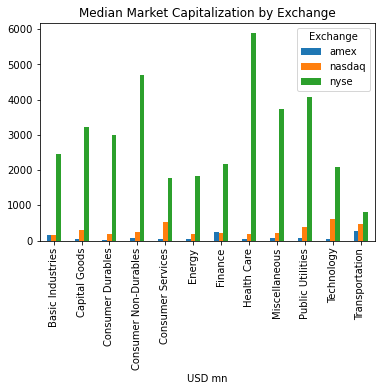

In [37]:
# Create market_cap_m
listing_data_2['market_cap_m'] = listing_data_2['Market Capitalization'].div(1e6)

# Group listings by Sector and Exchange
by_sector_exchange = listing_data_2.groupby(['Sector', 'Exchange'])

# Calculate the median market cap
mcap_by_sector_exchange = by_sector_exchange.market_cap_m.median()

# Display the head of the result
print(mcap_by_sector_exchange.head())

# Unstack mcap_by_sector_exchange
mcap_unstacked = mcap_by_sector_exchange.unstack()

# Plot as a bar chart
mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange')

# Set the x label
plt.xlabel('USD mn')

# Show the plot
plt.show()

### Calculate several metrics by sector and exchange

The .agg() function allows you to aggregate your data in even more ways by accepting two kinds of arguments. Providing a list of names of statistical methods calculates more than one summary statistic at once, and providing a dictionary where keys are column names and values are statistical methods applies a particular summary statistic to a designated column.

In this exercise, you will calculate the mean, median, and standard deviation of market capitalizations in millions of USD. pandas as pd and matplotlib.pyplot as plt have been imported, and the listings DataFrame, with reference column 'Exchange' is available in your workspace.

In [91]:

# Create market_cap_m
listing_data_3['market_cap_m'] = listing_data_3['Market Capitalization'].div(1e6)


In [92]:
# Group listing by both Sector and Exchange
by_sector_exchange = listing_data_3.groupby(['Sector', 'Exchange'])

In [96]:
# Subset market_cap_m of by_sector_exchange
bse_mcm = by_sector_exchange['market_cap_m']

# Calculate mean, median, and std in summary
summary = bse_mcm.agg({ 'mean',  'median',  'std'})

# Print the summary
print(summary)

                                        mean       median           std
Sector                Exchange                                         
Basic Industries      amex        391.646249   148.564581    605.307911
                      nasdaq      724.899934   150.385214   1445.544949
                      nyse       9590.514730  2450.240499  24845.469793
Capital Goods         amex        113.943659    49.596035    161.946636
                      nasdaq     1511.237373   293.801019   4829.846757
                      nyse      10166.901284  3215.112817  20254.615284
Consumer Durables     amex        234.445870    18.337396    441.813008
                      nasdaq      839.802607   177.593858   1907.604606
                      nyse       5854.121680  2982.585002   8996.673435
Consumer Non-Durables amex       8868.469007    60.087022  31715.734906
                      nasdaq     3104.051206   229.930660  12998.094858
                      nyse      17798.582072  4701.717926  36608

### Summary statistics by category with seaborn

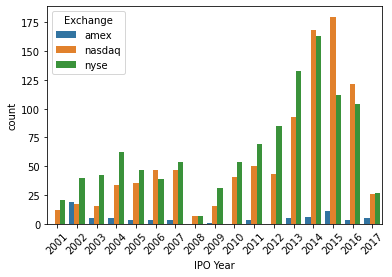

In [60]:
# Select IPOs after 2000
listing_data_2 = listing_data_2[listing_data_2['IPO Year'] > 2000]

# Convert IPO Year to integer
listing_data_2['IPO Year'] = listing_data_2['IPO Year'].astype(int)

# Create a countplot
sns.countplot(x='IPO Year', hue='Exchange', data=listing_data_2)

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Global median per capita income over time

The seaborn pointplot() function facilitates the comparison of summary statistics of a numerical variable for different levels of categorical variables:

seaborn.pointplot(x=None, y=None, hue=None, data=None, ...)

In the video, you saw a visualization for the market capitalization (the numerical variable) differentiated by whether the IPO (the categorical variable) occurred before (first level) or after (second level) the year 2000.

In this exercise, you will compare the mean market capitalization for each year since 2000 for the NYSE and the NASDAQ, after excluding outliers beyond the 95th percentile. pandas as pd and matplotlib.pyplot as plt have been imported, and the listings DataFrame with reference column 'Exchange' is available in your workspace.

In [61]:
# Import the data
income_trend = pd.read_csv('income_trend.csv')

In [62]:

# Drop missing values and convert to integers
income_trend['Year'] = income_trend['Year'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2959 non-null   int64  
 1   Country            2959 non-null   object 
 2   Year               2959 non-null   int64  
 3   Income per Capita  2959 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 92.6+ KB


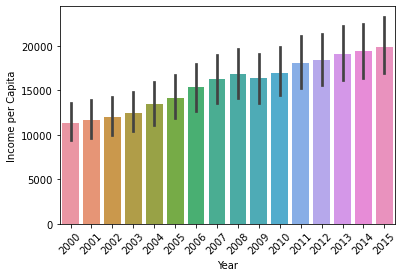

In [63]:
# Inspect the data
income_trend.info()

# Create barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the plot
plt.close()

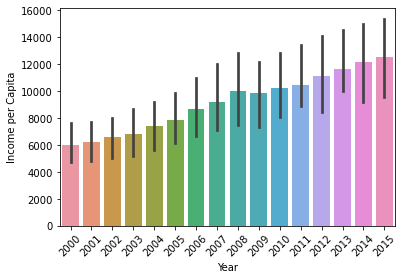

In [64]:
# Create second barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend, estimator=np.median)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

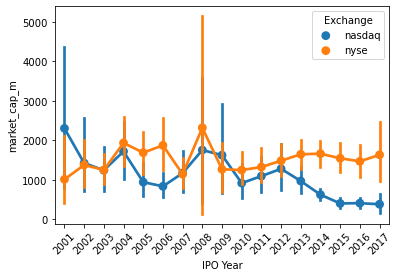

In [65]:
# Import the seaborn library as sns
import seaborn as sns

# Exclude IPOs before 2000 and from the 'amex'
listing_data = listing_data[(listing_data['IPO Year'] > 2000) & (listing_data.Exchange != 'amex')]

# Convert IPO Year to integer
listing_data['IPO Year'] = listing_data['IPO Year'].astype(int)

# Create market_cap_m
listing_data['market_cap_m'] = listing_data['Market Capitalization'].div(1e6)

# Exclude outliers
listing_data = listing_data[listing_data.market_cap_m < listing_data.market_cap_m.quantile(.95)]

# Create the pointplot
sns.pointplot(x='IPO Year', y='market_cap_m', hue='Exchange', data=listing_data)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Inflation trends in China, India, and the US

Finally, the seaborn package includes functions that allow you to visualize the distribution of levels of categorical variables.

In the next two exercises, you will examine the historical inflation data in China, India, and the US over the past 50+ years in data from FRED. Before jumping into using the functions you have just learned, you should first familiarize yourself with the raw data. pandas as pd, matplotlib.pyplot as plt, and seaborn as sns have been imported for you. The FRED inflation data is in your workspace as inflation.

In [66]:
# Import the data
inflation = pd.read_csv('inflation.csv')

# Display first 10 rows
print(inflation.head(10))

# Inspect nasdaq
inflation.info()

         DATE Country  Inflation
0  1960-01-01   India   1.779878
1  1961-01-01   India   1.695213
2  1962-01-01   India   3.632215
3  1963-01-01   India   2.946161
4  1964-01-01   India  13.355261
5  1965-01-01   India   9.474759
6  1966-01-01   India  10.801848
7  1967-01-01   India  13.062202
8  1968-01-01   India   3.237412
9  1969-01-01   India  -0.584137
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       180 non-null    object 
 1   Country    180 non-null    object 
 2   Inflation  153 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       180 non-null    object 
 1   Country    180 non-null    object 
 2   Inflation  153 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.3+ KB


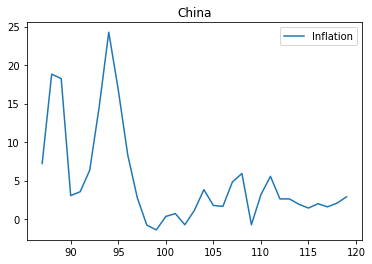

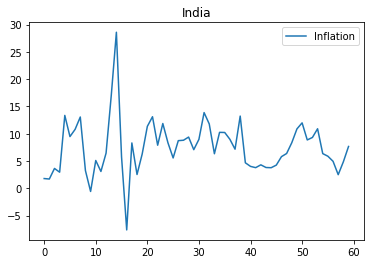

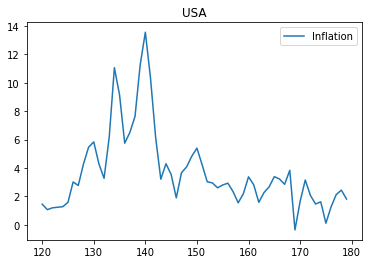

In [67]:
# Inspect the inflation data
inflation.info()

# Create inflation_by_country
inflation_by_country = inflation.groupby('Country')

# Iterate over inflation_by_country and plot the inflation time series per country
for country, data in inflation_by_country:
    # Plot the data
    data.plot(title=country)
    # Show the plot
    plt.show()

### Distribution of inflation rates in China, India, and the US

As you saw in the video, the boxplot() function displays key quantiles of a distribution with respect to categories, where y represents a quantitative variable, and x a categorical variable. In statistics, this kind of distribution is known as a box-and-whisker plot.

A complement to a box plot is a swarmplot(), which draws a categorical scatterplot that displays all categorical observations without overlapping; it takes similar arguments to boxplot():

seaborn.boxplot(x=None, y=None, data=None, ...)
seaborn.swarmplot(x=None, y=None, data=None, ...)

In this final exercise, you will compare the historical distributions of inflation rates by country - specifically China, India, and the US - instead of by time series trends. pandas as pd, matplotlib.pyplot as plt, and seaborn as sns have been imported for you. The FRED inflation data is in your workspace as inflation.

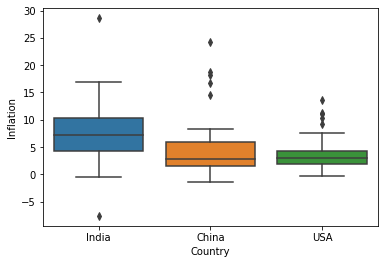

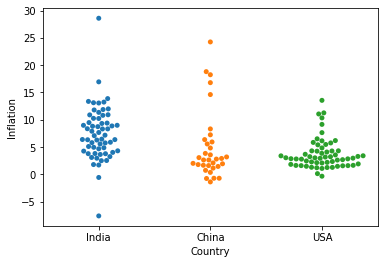

In [68]:
# Create boxplot
sns.boxplot(x='Country' , y='Inflation', data=inflation)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create swarmplot
sns.swarmplot(x='Country' , y='Inflation', data=inflation)

# Show the plot
plt.show()

# FINISH